# Técnicas de Machine Learning para Classificação Supervisionada de Contas Bots do Twitter.

## FIA LABDATA - Turma 13

### Fabio Daleffi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_accounts = pd.read_csv('classified_twitter_accounts.csv')
df_accounts.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,default_profile,...,dataset,screen_name_total_len,screen_name_num_len,name_total_len,name_num_len,is_url_null,is_location_null,profile_banner_url_null,profile_image_url_null,description_null
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,ja,False,...,genuine,8,4,15,0,True,False,False,False,False
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,ja,True,...,genuine,8,4,5,0,True,False,False,False,False
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,en,False,...,genuine,9,2,8,0,True,True,False,False,False
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,en,False,...,genuine,11,0,17,0,False,False,False,False,False
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,en,True,...,genuine,15,8,8,0,True,False,True,False,False


In [3]:
df_metrics = pd.read_csv('accounts_tweet_metrics.csv')
df_metrics.head()

,user_id,tweet_count,mean_hashtag_usage,mean_url_usage,mean_mention_usage,mean_replies_made,mean_retweets_made,mean_reply_received,mean_retweet_received,avg_tweets_per_day,avg_word_count
0,678033,3195,0.368388,0.297653,1.112989,0.339280,0.287950,0.0,75.970266,18.257143,17.361189
1,722623,3201,0.360512,0.163386,0.711965,0.280850,0.175883,0.0,283.785067,5.453152,13.578257
2,755116,3209,0.040199,0.123715,0.959177,0.518542,0.068869,0.0,32.989716,16.801047,12.978186
3,755746,3234,0.269944,0.461657,0.682127,0.346939,0.085343,0.0,199.153370,5.372093,13.115337
4,785080,3235,0.051932,0.063988,0.782380,0.428748,0.120556,0.0,43.263060,23.273381,15.229675


In [106]:
df_account_metrics = df_accounts.join(df_metrics.set_index('user_id'), on='id', how='left').copy()

In [107]:
print(df_metrics.shape)
print(df_accounts.shape)
print(df_account_metrics.shape)

(10197, 11)
(14368, 25)
(14368, 35)


In [108]:
df_account_metrics.isnull().sum()

id                            0
name                          0
screen_name                   0
statuses_count                0
followers_count               0
friends_count                 0
favourites_count              0
listed_count                  0
lang                          0
default_profile               0
default_profile_image         0
geo_enabled                   0
protected                     0
verified                      0
classification                0
dataset                       0
screen_name_total_len         0
screen_name_num_len           0
name_total_len                0
name_num_len                  0
is_url_null                   0
is_location_null              0
profile_banner_url_null       0
profile_image_url_null        0
description_null              0
tweet_count                4171
mean_hashtag_usage         4171
mean_url_usage             4171
mean_mention_usage         4171
mean_replies_made          4171
mean_retweets_made         4171
mean_rep

In [109]:
df_account_metrics[df_account_metrics.tweet_count.isnull()].groupby('dataset').agg(qtd_null = ('dataset','count'))

,qtd_null
dataset,
fake_followers,149
genuine,2391
traditional_spambots_2,100
traditional_spambots_3,403
traditional_spambots_4,1128


In [110]:
df_account_metrics.dtypes

id                           int64
name                        object
screen_name                 object
statuses_count               int64
followers_count              int64
friends_count                int64
favourites_count             int64
listed_count                 int64
lang                        object
default_profile               bool
default_profile_image         bool
geo_enabled                   bool
protected                     bool
verified                      bool
classification              object
dataset                     object
screen_name_total_len        int64
screen_name_num_len          int64
name_total_len               int64
name_num_len                 int64
is_url_null                   bool
is_location_null              bool
profile_banner_url_null       bool
profile_image_url_null        bool
description_null              bool
tweet_count                float64
mean_hashtag_usage         float64
mean_url_usage             float64
mean_mention_usage  

In [111]:
drop_features = ['id', 'screen_name', 'name', 'tweet_count', 'lang']
df_account_metrics.drop(drop_features, inplace=True, axis = 1)

# Exploratoria

In [112]:
df_account_metrics.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'default_profile',
       'default_profile_image', 'geo_enabled', 'protected', 'verified',
       'classification', 'dataset', 'screen_name_total_len',
       'screen_name_num_len', 'name_total_len', 'name_num_len', 'is_url_null',
       'is_location_null', 'profile_banner_url_null', 'profile_image_url_null',
       'description_null', 'mean_hashtag_usage', 'mean_url_usage',
       'mean_mention_usage', 'mean_replies_made', 'mean_retweets_made',
       'mean_reply_received', 'mean_retweet_received', 'avg_tweets_per_day',
       'avg_word_count'],
      dtype='object')

In [113]:
df_account_metrics.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,screen_name_total_len,screen_name_num_len,name_total_len,name_num_len,mean_hashtag_usage,mean_url_usage,mean_mention_usage,mean_replies_made,mean_retweets_made,mean_reply_received,mean_retweet_received,avg_tweets_per_day,avg_word_count
count,14368.000000,1.436800e+04,14368.000000,14368.000000,14368.000000,14368.000000,14368.000000,14368.000000,14368.000000,10197.000000,10197.000000,10197.000000,10197.000000,10197.000000,10197.000000,10197.000000,10197.000000,10197.000000
mean,5063.190910,8.682774e+02,589.318834,1145.288280,11.173998,11.813057,0.374165,12.498121,0.023942,0.139122,0.149944,0.256362,0.173551,0.049553,0.221321,219.584592,8.191954,11.544630
std,17493.409898,2.688472e+04,2665.832959,6036.894173,266.966297,2.340058,1.059269,3.907666,0.326309,0.205675,0.287265,0.300998,0.194890,0.128492,4.591587,2034.984167,23.224949,2.547193
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,31.000000,6.000000e+00,42.000000,0.000000,0.000000,10.000000,0.000000,11.000000,0.000000,0.046729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,10.227273
50%,63.000000,2.500000e+01,250.000000,0.000000,0.000000,12.000000,0.000000,13.000000,0.000000,0.083399,0.007246,0.250000,0.033493,0.000000,0.000000,0.043165,4.142857,11.768519
75%,1365.250000,3.320000e+02,538.000000,9.000000,3.000000,14.000000,0.000000,15.000000,0.000000,0.158416,0.105263,0.366972,0.362500,0.022727,0.000000,2.803835,5.041667,12.966292
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,15.000000,13.000000,48.000000,25.000000,6.364655,2.000000,2.699906,1.000000,1.000000,337.637931,68859.375000,1074.333333,32.000000


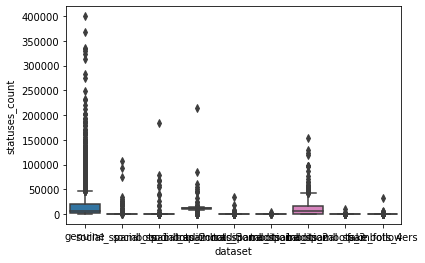

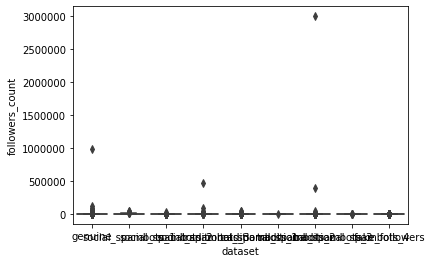

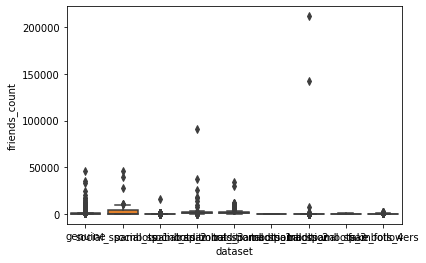

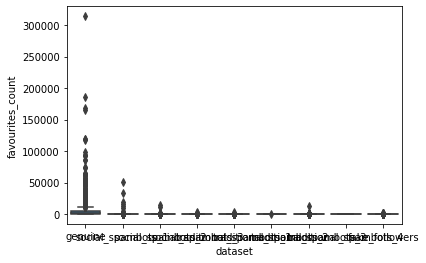

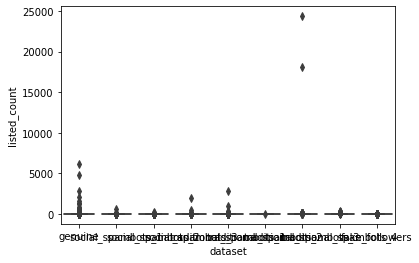

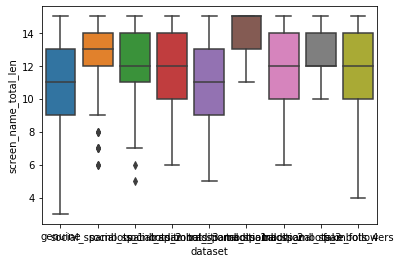

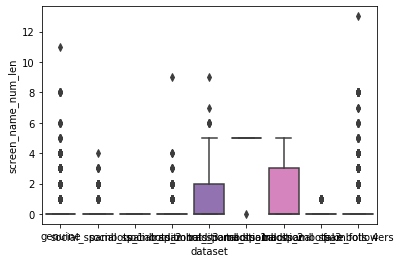

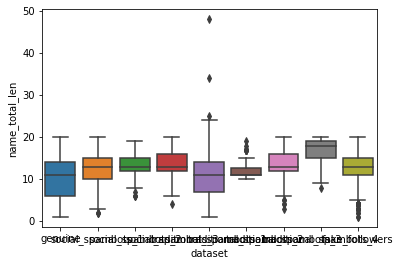

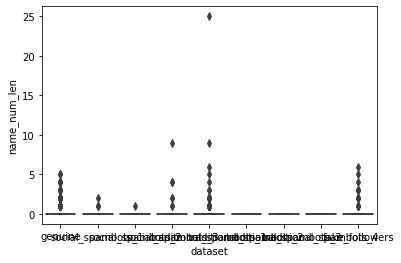

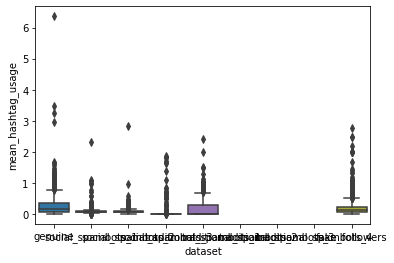

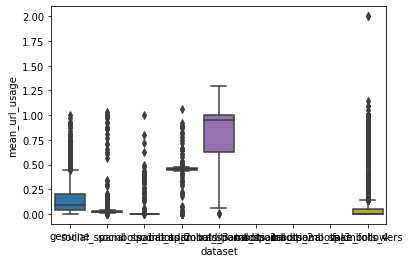

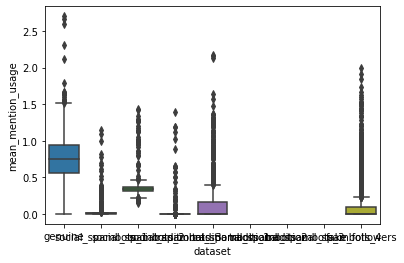

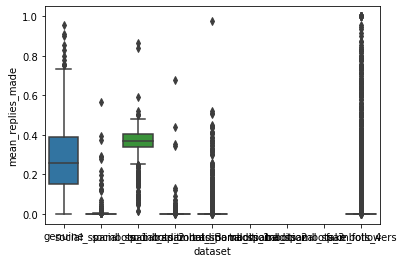

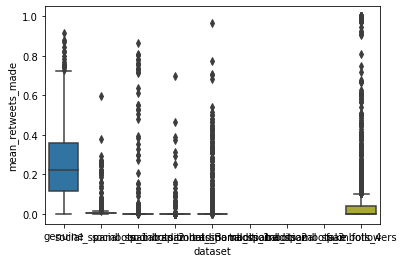

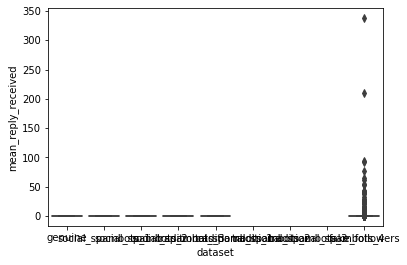

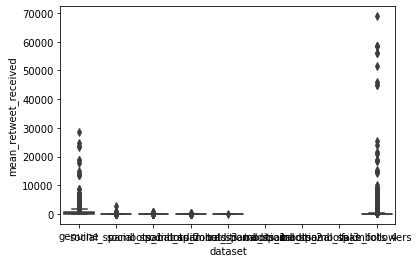

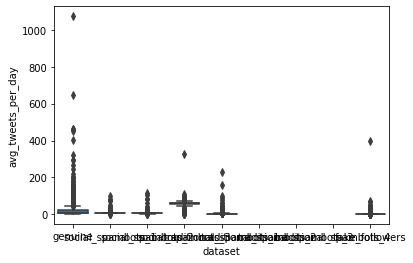

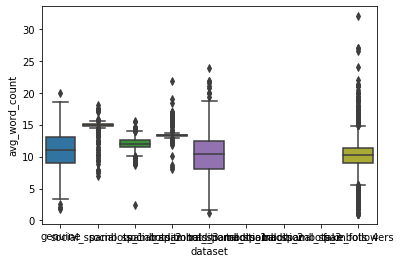

In [12]:
quant_columns = enumerate(df_account_metrics.describe().columns)
for i, column in quant_columns:
    plt.figure(i, )
    sns.boxplot(y = df_account_metrics[column], x = df_account_metrics['dataset'],)

# Pre Processing

Categorizar as features continuas para eliminar outliers

Normalizar quant

subtrair media e dividr po desvio padrao

checar precision e recall
    se precison e rcall ruim
        balancear a base
        deixar apenas uma classe de bot
            balancear a base com a nova classe de bot

In [114]:
bool_vars = [
    'default_profile',
    'default_profile_image',
    'geo_enabled',
    'protected',
    'verified',
    'is_url_null',
    'is_location_null',
    'profile_banner_url_null',
    'profile_image_url_null',
    'description_null',
]

df_account_metrics[bool_vars] = df_account_metrics[bool_vars].astype(int)

In [115]:
df_account_metrics = df_account_metrics.fillna(-99)

## Categorizacao das features por quartis

In [116]:
df_account_metrics_cat = df_account_metrics.copy()

In [117]:
df_account_metrics_cat['followers_count'] = pd.cut(df_account_metrics_cat.followers_count, bins=[-1,6,25,332,2991573], labels=[
     '1 - DE 0 ATE 6'
    ,'2 - DE 7 ATE 25'
    ,'3 - DE 26 ATE 332'
    ,'4 - ACIMA DE 332'
] )

In [118]:
df_account_metrics_cat['statuses_count'] = pd.cut(df_account_metrics_cat.statuses_count, bins=[-1,31,63,1365,399555], labels=[
     '1 - DE 0 ATE 31'
    ,'2 - DE 32 ATE 63'
    ,'3 - DE 64 ATE 1365'
    ,'4 - ACIMA DE 1365'
] )

In [119]:
df_account_metrics_cat['friends_count'] = pd.cut(df_account_metrics_cat.friends_count, bins=[-1,42,250,538,211890], labels=[
     '1 - DE 0 ATE 42'
    ,'2 - DE 43 ATE 250'
    ,'3 - DE 251 ATE 538'
    ,'4 - ACIMA DE 538'
])

In [120]:
df_account_metrics_cat['favourites_count'] = pd.cut(df_account_metrics_cat.favourites_count, bins=[-1,9,313954], labels=[
     '1 - DE 0 TE 9'
    ,'2 - ACIMA DE 9'
])

In [121]:
df_account_metrics_cat['listed_count'] = pd.cut(df_account_metrics_cat.listed_count, bins=[-1,3,24348], labels=[
     '1 - DE 0 ATE 3'
    ,'2 - ACIMA DE 3'
])

In [122]:
df_account_metrics_cat['name_num_len'] = pd.cut(df_account_metrics_cat.name_num_len, bins=[-1,0,25], labels=[
     '1 - ZERO'
    ,'2 - ACIMA DE ZERO'
])

In [123]:
df_account_metrics_cat['screen_name_num_len'] = pd.cut(df_account_metrics_cat.screen_name_num_len, bins=[-1,0,13], labels=[
     '1 - ZERO'
    ,'2 - ACIMA DE ZERO'
])

In [124]:
df_account_metrics_cat['screen_name_total_len'] = pd.cut(df_account_metrics_cat.screen_name_total_len, bins=[-1,10,12,14,15], labels=[
     '1 - DE 0 A 10'
    ,'2 - DE 11 A 12'
    ,'3 - DE 13 A 14'
    ,'4 - ACIMA DE 14'
])

In [125]:
df_account_metrics_cat['name_total_len'] = pd.cut(df_account_metrics_cat.name_total_len, bins=[-1,11,13,15,48], labels=[
     '1 - DE 0 A 11'
    ,'2 - DE 12 A 13'
    ,'3 - DE 14 A 15'
    ,'4 - MAIOR QUE 15'
])

In [126]:
df_account_metrics_cat['mean_url_usage'] = pd.cut(df_account_metrics_cat.mean_url_usage, bins=[-100,-1,0.36,2], labels=[
     '1 - MISSING'
    ,'2 - DE 0 A 0.36'
    ,'3 - ACIMA DE 0.36'
])

In [127]:
df_account_metrics_cat['mean_hashtag_usage'] = pd.cut(df_account_metrics_cat.mean_hashtag_usage, bins=[-100,-1,0.055,0.11,6.364655], labels=[
     '1 - MISSING'
    ,'2 - DE 0 A 0.055'
    ,'3 - DE 0.056 A 0.11'
    ,'4 - ACIMA DE 0.11'
])

In [128]:
df_account_metrics_cat['mean_mention_usage'] = pd.cut(df_account_metrics_cat.mean_mention_usage, bins=[-100,-1,0.004,0.3,2.699906], labels=[
     '1 - MISSING'
    ,'2 - DE 0 A 0.004'
    ,'3 - DE 0.005 A 0.3'
    ,'4 - ACIMA DE 0.3'
])

In [129]:
df_account_metrics_cat['mean_replies_made'] = pd.cut(df_account_metrics_cat.mean_replies_made, bins=[-100,-1,0.322,1], labels=[
     '1 - MISSING'
    ,'2 - DE 0 A 0.322'
    ,'3 - ACIMA DE 0.322'
])

In [130]:
df_account_metrics_cat['mean_retweets_made'] = pd.cut(df_account_metrics_cat.mean_retweets_made, bins=[-100,-1,0.003512,1], labels=[
     '1 - MISSING'
    ,'2 - DE 0 A 0.0035'
    ,'3 - ACIMA DE 0.0035'
])

In [131]:
df_account_metrics_cat['mean_reply_received'] = pd.cut(df_account_metrics_cat.mean_reply_received, bins=[-100,-1,0,338], labels=[
     '1 - MISSING'
    ,'2 - ZERO'
    ,'3 - ACIMA DE 0'
])

In [132]:
df_account_metrics_cat['mean_retweet_received'] = pd.cut(df_account_metrics_cat.mean_retweet_received, bins=[-100,-1,0.007982,0.085366, 68860], labels=[
     '1 - MISSING'
    ,'2 - DE 0 A 0.007982'
    ,'3 - DE 0.007982 ATE 0.085366' 
    ,'4 - ACIMDA DE 0.085366'
])

In [133]:
df_account_metrics_cat['avg_tweets_per_day'] = pd.cut(df_account_metrics_cat.avg_tweets_per_day, bins=[-100,-1,1.277778,4.521739, 1075], labels=[
     '1 - MISSING'
    ,'2 - DE 0 A 1.277778'
    ,'3 - DE 1.277779 ATE 4.521739' 
    ,'4 - ACIMDA DE 4.521739'
])

In [134]:
df_account_metrics_cat['avg_word_count'] = pd.cut(df_account_metrics_cat.avg_word_count, bins=[-100,-1,10.611594,12.373750, 32], labels=[
     '1 - MISSING'
    ,'2 - DE 0 A 10.611594'
    ,'3 - DE 10.611595 ATE 12.373750' 
    ,'4 - ACIMDA DE 12.373750'
])

In [135]:
df_account_metrics_cat.dtypes

statuses_count             category
followers_count            category
friends_count              category
favourites_count           category
listed_count               category
default_profile               int32
default_profile_image         int32
geo_enabled                   int32
protected                     int32
verified                      int32
classification               object
dataset                      object
screen_name_total_len      category
screen_name_num_len        category
name_total_len             category
name_num_len               category
is_url_null                   int32
is_location_null              int32
profile_banner_url_null       int32
profile_image_url_null        int32
description_null              int32
mean_hashtag_usage         category
mean_url_usage             category
mean_mention_usage         category
mean_replies_made          category
mean_retweets_made         category
mean_reply_received        category
mean_retweet_received      c

In [136]:
# df_account_metrics
df_account_metrics['target'] = np.where(df_account_metrics['classification'] == 'bot', 1, 0)
drop_features = ['dataset','classification']
df_account_metrics.drop(drop_features, inplace=True, axis = 1)

In [137]:
# df_account_metrics_cat
df_account_metrics_cat['target'] = np.where(df_account_metrics_cat['classification'] == 'bot', 1, 0)
drop_features = ['dataset','classification']
df_account_metrics_cat.drop(drop_features, inplace=True, axis = 1)

# Machine Learning

In [84]:
X = df_account_metrics.drop('target', axis = 1).copy()
y = df_account_metrics['target'].copy()

random_state = 123

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
from sklearn.metrics import accuracy_score

y_predictions = dt.predict(X_test)
accuracy_score(y_test, y_predictions)

0.9832985386221295

In [40]:
columns = X_test.columns
feature_importances = pd.Series(dt.feature_importances_)

df_feature_importances = pd.DataFrame({"column":columns,"feature_importances" : feature_importances})
df_feature_importances.sort_values(by = 'feature_importances', ascending=False).head(10)

,column,feature_importances
3,favourites_count,0.954800
24,mean_reply_received,0.013178
0,statuses_count,0.011939
2,friends_count,0.008758
19,mean_hashtag_usage,0.005400
17,profile_image_url_null,0.003815
4,listed_count,0.001292
14,is_url_null,0.000472
16,profile_banner_url_null,0.000346
8,protected,0.000000


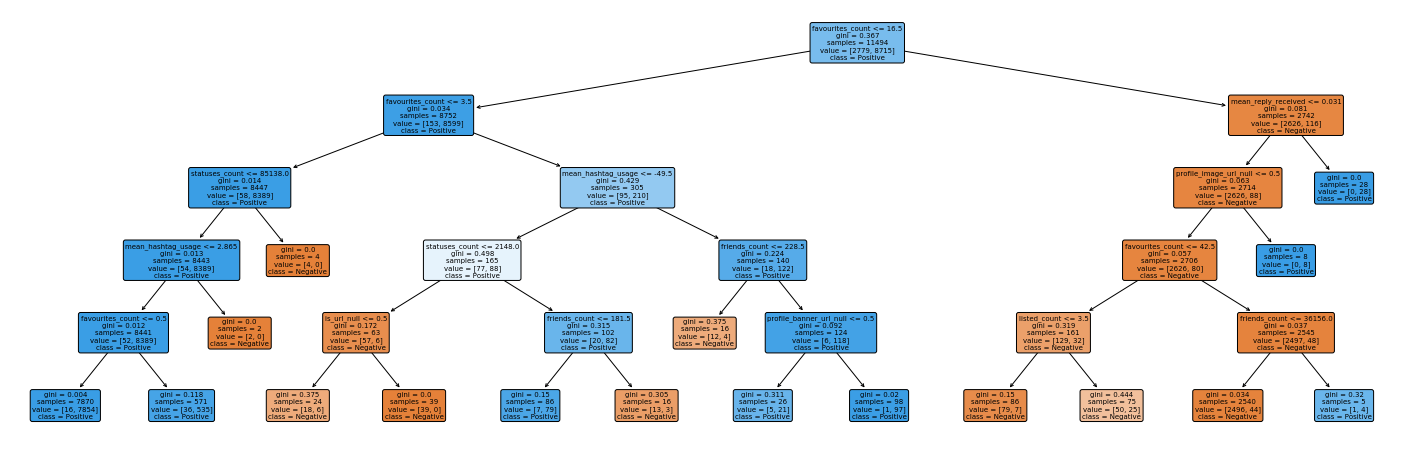

In [41]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(25, 8))

plot_tree(dt, ax=ax, filled=True, feature_names=X.columns, class_names=['Negative', 'Positive'], rounded=True);

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, min_samples_split=50)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
from sklearn.metrics import accuracy_score

y_predictions = rf.predict(X_test)
accuracy_score(y_test, y_predictions)

0.9867780097425192

In [44]:
rf_feature_importances = pd.Series(rf.feature_importances_)

df_feature_importances = pd.DataFrame({"column":columns,"feature_importances" : rf_feature_importances})
df_feature_importances.sort_values(by = 'feature_importances', ascending=False).head(10)

,column,feature_importances
3,favourites_count,0.366947
0,statuses_count,0.168567
16,profile_banner_url_null,0.103402
1,followers_count,0.054998
7,geo_enabled,0.034241
21,mean_mention_usage,0.030723
25,mean_retweet_received,0.023805
14,is_url_null,0.021863
22,mean_replies_made,0.021160
20,mean_url_usage,0.020481
